c:\python39\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


<span style='color:blue'>**DROWSINESS DETECTION SYSTEM USING PYTHON**</span>

if literate enter 'y' else enter 'N' : y


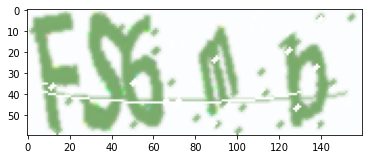

./captcha_Fs6mb.png has been created.
ENTER THE CAPTCHA SHOWN IN SCREEN : FS6mb


<span style='color:red'>**INVALID CAPTCHA**</span>

In [1]:
from captcha.image import ImageCaptcha
from captcha.audio import AudioCaptcha
import matplotlib.pyplot as plt
import random
import IPython
from IPython.display import Image
from IPython.display import Markdown, display
from IPython.display import Audio
from pydub import AudioSegment
from pydub.playback import play
import speech_recognition as sr
import pyaudio
import os
import gtts as gt 

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

    
def remove(string):
    return string.replace(" ", "")


# The number list, lower case character list and upper case character list are used to generate captcha text.
number_list = ['0','1','2','3','4','5','6','7','8','9']

alphabet_lowercase = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

alphabet_uppercase = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

    
# This function will create a random captcha string text based on above three list.
# The input parameter is the captcha text length.
def create_random_captcha_text(captcha_string_size=5):

    captcha_string_list = []

    base_char = alphabet_lowercase + alphabet_uppercase + number_list

    for i in range(captcha_string_size):

        # Select one character randomly.
        char = random.choice(base_char)

        # Append the character to the list.
        captcha_string_list.append(char)

    captcha_string = ''

    # Change the character list to string.    
    for item in captcha_string_list:
        captcha_string += str(item)

    return captcha_string

# This function will create a fully digital captcha string text.
def create_random_digital_text(captcha_string_size=5):

    captcha_string_list = []
    # Loop in the number list and return a digital captcha string list
    for i in range(captcha_string_size):
        char = random.choice(number_list)
        captcha_string_list.append(char)
        
    captcha_string = ''

    # Convert the digital list to string.    
    for item in captcha_string_list:
        captcha_string += str(item)

    return captcha_string

# Create an image captcha with special text.
def create_image_captcha(captcha_text):
    image_captcha = ImageCaptcha()
    # Create the captcha image.
    image = image_captcha.generate_image(captcha_text)

    # Add noise curve for the image.
    image_captcha.create_noise_curve(image, image.getcolors())

    # Add noise dots for the image.
    image_captcha.create_noise_dots(image, image.getcolors())

    # Save the image to a png file.
    image_file = "./captcha_"+captcha_text + ".png"
    image_captcha.write(captcha_text, image_file)
    
    # Display the image in a matplotlib viewer.
    plt.imshow(image)
    plt.show()

    print(image_file + " has been created.")
    
    usercaptcha = input("ENTER THE CAPTCHA SHOWN IN SCREEN : ")
    if usercaptcha == captcha_text:
        printmd("**LEVEL 1 CHECKING IS COMPLETED**", color="green")
        printmd("**MOVE ON TO LEVEL 2 CHECKING**", color="green")
    else:
        printmd("**INVALID CAPTCHA**", color="red")
# Create an audio captcha file.    
def create_audio_captcha():
    audio_captcha = AudioCaptcha()

    # Because we use the default module voice library, so we can only generate digital text voice.
    captcha_text = create_random_digital_text()
    captcha_text_temp = ""
    for a in captcha_text:
        captcha_text_temp = captcha_text_temp + a +' '
    print(captcha_text_temp)
    #captcha_text = captcha_text_temp
    # Generate the audio captcha file.
    #audio_data = audio_captcha.generate(captcha_text)
    # Save the autiod captcha file.
    tts = gt.gTTS(text=captcha_text_temp, lang='ta')
    tts.save("Tamil.mp3")
    os.system("Tamil.mp3")

    return captcha_text

if __name__ == '__main__':
    # Create random text.
    captcha_text = create_random_captcha_text()
    printmd("**DROWSINESS DETECTION SYSTEM USING PYTHON**", color="blue")
    yrn=input("if literate enter 'y' else enter 'N' : ")
    if yrn == 'Y' or yrn == 'y':
        # Create image captcha.
        create_image_captcha(captcha_text)
    else:
        # Create audio captcha.
        cap_text = create_audio_captcha()
        print(cap_text)
        lst = [ ]
        r = sr.Recognizer()
        with sr.Microphone() as source:
            # read the audio data from the default microphone
            audio_data = r.record(source, duration=15)
            print("Recognizing...")
            # convert speech to text
            text = r.recognize_google(audio_data,language="ta-IN")
            lst.append(text)
        #rec_text = remove(lst[0])
        rec_text = str(lst)
        rec_text = rec_text.replace(" ","")
        rec_text = rec_text[2:7]
        print("rec_text-->",rec_text)
        
        if cap_text == rec_text :
            printmd("**LEVEL 1 CHECKING IS COMPLETED**", color="green")
            printmd("**MOVE ON TO LEVEL 2 CHECKING**", color="green")
        else:
            printmd("**INVALID CAPTCHA**", color="red")

In [1]:
# Python program to illustrate 
# saving an operated video
  
# organize imports
import numpy as np
import cv2
  
# This will return video from the first webcam on your computer.
cap = cv2.VideoCapture(0)  
  
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))
  
# loop runs if capturing has been initialized. 
while(True):
    # reads frames from a camera 
    # ret checks return at each frame
    ret, frame = cap.read() 
      
    # output the frame
    out.write(frame) 
      
    # The original input frame is shown in the window 
    cv2.imshow('Original', frame)    
    # Wait for 'a' key to stop the program 
    if cv2.waitKey(1) & 0xFF == ord('a'):
        break
  
# Close the window / Release webcam
cap.release()
  
# After we release our webcam, we also release the output
out.release() 
  
# De-allocate any associated memory usage 
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [5]:
import cv2
import os
from keras.models import load_model
import numpy as np
from pygame import mixer
import time

mixer.init()
sound = mixer.Sound('E:/project1/Drowsiness detection/Drowsiness detection/alarm.wav')

face = cv2.CascadeClassifier('E:/project1/Drowsiness detection/Drowsiness detection/haar cascade files/haarcascade_frontalface_alt.xml')
leye = cv2.CascadeClassifier('E:/project1/Drowsiness detection/Drowsiness detection/haar cascade files/haarcascade_lefteye_2splits.xml')
reye = cv2.CascadeClassifier('E:/project1/Drowsiness detection/Drowsiness detection/haar cascade files/haarcascade_righteye_2splits.xml')

lbl=['Close','Open']

model = load_model('E:/project1/Drowsiness detection/Drowsiness detection/models/cnnCat2.h5')
path = os.getcwd()
cap = cv2.VideoCapture('output.avi')
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output1.avi', fourcc, 20.0, (640, 480))
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
count=0
score=0
thicc=2
rpred=[99]
lpred=[99]

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        height,width = frame.shape[:2] 
        frame1 = frame
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        out.write(frame) 

        faces = face.detectMultiScale(gray,minNeighbors=5,scaleFactor=1.1,minSize=(25,25))
        left_eye = leye.detectMultiScale(gray)
        right_eye =  reye.detectMultiScale(gray)

        cv2.rectangle(frame, (0,height-50) , (200,height) , (0,0,0) , thickness=cv2.FILLED )

        for (x,y,w,h) in faces:
            cv2.rectangle(frame, (x,y) , (x+w,y+h) , (100,100,100) , 1 )

        for (x,y,w,h) in right_eye:
            r_eye=frame[y:y+h,x:x+w]
            count=count+1
            r_eye = cv2.cvtColor(r_eye,cv2.COLOR_BGR2GRAY)
            r_eye = cv2.resize(r_eye,(24,24))
            r_eye= r_eye/255
            r_eye=  r_eye.reshape(24,24,-1)
            r_eye = np.expand_dims(r_eye,axis=0)
            rpred = model.predict_classes(r_eye)
            if(rpred[0]==1):
                lbl='Open' 
            if(rpred[0]==0):
                lbl='Closed'
            break

        for (x,y,w,h) in left_eye:
            l_eye=frame[y:y+h,x:x+w]
            count=count+1
            l_eye = cv2.cvtColor(l_eye,cv2.COLOR_BGR2GRAY)  
            l_eye = cv2.resize(l_eye,(24,24))
            l_eye= l_eye/255
            l_eye=l_eye.reshape(24,24,-1)
            l_eye = np.expand_dims(l_eye,axis=0)
            lpred = model.predict_classes(l_eye)
            if(lpred[0]==1):
                lbl='Open'   
            if(lpred[0]==0):
                lbl='Closed'
            break

        if(rpred[0]==0 and lpred[0]==0):
            score=score+1
            cv2.putText(frame,"Closed",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
        # if(rpred[0]==1 or lpred[0]==1):
        else:
            score=score-1
            cv2.putText(frame,"Open",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)


        if(score<0):
            score=0   
        cv2.putText(frame,'Score:'+str(score),(100,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
        if(score>15):
            #person is feeling sleepy so we beep the alarm
            cv2.imwrite(os.path.join(path,'image.jpg'),frame)
            try:
                sound.play()

            except:  # isplaying = False
                pass
            if(thicc<16):
                thicc= thicc+2
            else:
                thicc=thicc-2
                if(thicc<2):
                    thicc=2
            cv2.rectangle(frame,(0,0),(width,height),(0,0,255),thicc) 
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()
print(score)
if score > 25:
    printmd("**NOT ALLOW TO DRIVE**",color = "red")
else:
    printmd("**LEVEL 2 CHECKING IS COMPLETED**",color="green")
    printmd("**KEY IS APPROVED**",color="green")
    

KeyboardInterrupt: 

In [2]:
cap.release()
cv2.destroyAllWindows()